In [1]:
import numpy as np                
import pandas as pd
import os

def file_name( user_dir):
        file_list = list()
        for root, dirs, files in os.walk(user_dir):
            for file in files:
                # if os.path.splitext(file)[1] == '.txt':
                if file.split('.')[-1]=='csv':
                    file_list.append(os.path.join(root, file))
        return file_list

path="car"     #此处的路径为存放excel的根目录
csv=file_name(path)         #得到一个列表，里面为10个excel的存放地址
print(csv)

['car\\AA00002.csv', 'car\\AB00006.csv', 'car\\AD00003.csv', 'car\\AD00013.csv', 'car\\AD00053.csv', 'car\\AD00083.csv', 'car\\AD00419.csv', 'car\\AF00098.csv', 'car\\AF00131.csv', 'car\\AF00373.csv']


计算加速度、角加速度；绘制速度、加速度、角加速度图（以车辆AA00002为例）

In [2]:
import time
import datetime
import math
import matplotlib.pyplot as plt

def composeTime(time1):
    time2 = datetime.datetime.strptime(time1, "%Y-%m-%d %H:%M:%S")
    time3 = time.mktime(time2.timetuple())
    time4 = int(time3)
    return time4
t=[]
v=[]
w=[]   #方向角，弧度
a=[]   #加速度
aw=[]   #角加速度
data=pd.read_csv(csv[0])
for i in range(len(data["location_time"])-1):
    t1=composeTime(data["location_time"][i])
    t2=composeTime(data["location_time"][i+1])
    v1=data["gps_speed"][i]
    v2=data["gps_speed"][i+1]
    w1=data["direction_angle"][i]
    w2=data["direction_angle"][i+1]
    t0=t2-t1
    v0=v2-v1
    w0=w2-w1
    a0=v0/t0
    aw0=w0/t0
    t.append(t0)
    v.append(v0)
    w.append(w0)
    a.append(a0)
    aw.append(aw0)

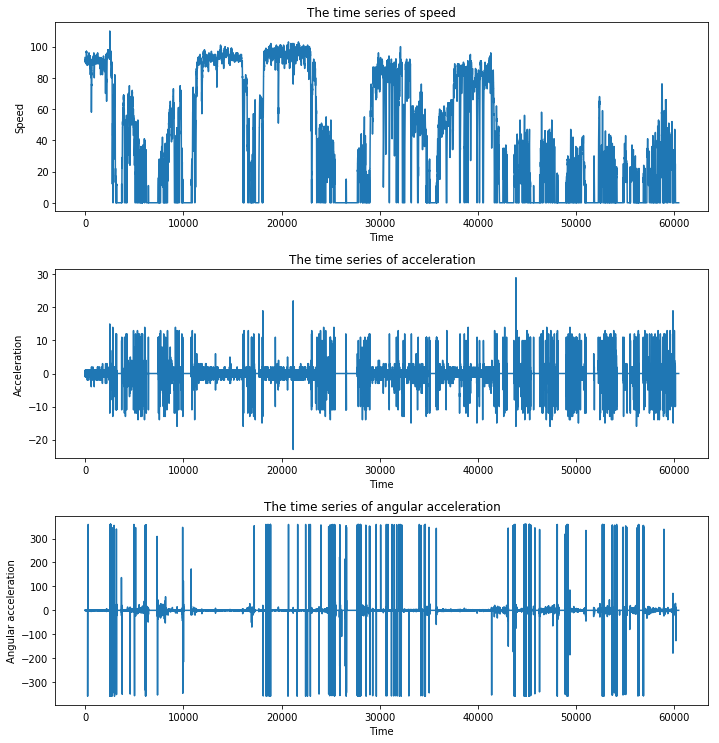

In [3]:
speed=data["gps_speed"]
#速度图
plt.figure(figsize=(10,10)) 
plt.subplot(3,1,1)
plt.plot(speed)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('The time series of speed')
plt.tight_layout()   #设置默认的间距
#加速度图
plt.subplot(3,1,2)
plt.plot(a)
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('The time series of acceleration')
plt.tight_layout()
#角加速度图
plt.subplot(3,1,3)
plt.plot(aw)
plt.xlabel('Time')
plt.ylabel('Angular acceleration')
plt.title('The time series of angular acceleration')
plt.show()